# 01 - Introduction To Causal Inference



## What is Causal Inference



## Why we Do Causal Inference
 


## Machine Learning and Causal Inference
 


## Association and Causation
 

In [217]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from cycler import cycler
import plotly_express as px



default_cycler = (cycler(color=['0.3', '0.5', '0.7', '0.5']) +
                  cycler(linestyle=['-', '--', ':', '-.']) + 
                  cycler(marker=['o', 'v', 'd', 'p']))

color=['0.3', '0.5', '0.7', '0.5']
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

plt.rc('axes', prop_cycle=default_cycler)
plt.rc('font', size=20)

In [218]:
data = pd.read_csv("./data/xmas_sales.csv")
data.head(6)

,store,weeks_to_xmas,avg_week_sales,is_on_sale,weekly_amount_sold
0,1,3,12.98,1,219.60
1,1,2,12.98,1,184.70
2,1,1,12.98,1,145.75
3,1,0,12.98,0,102.45
4,2,3,19.92,0,103.22
5,2,2,19.92,0,53.73


In [219]:
np.quantile(data['avg_week_sales'].values, q=np.arange(0, 1.1, 0.1))

array([ 9.7  , 14.523, 16.58 , 17.79 , 18.782, 19.815, 20.878, 22.293,
       23.762, 26.55 , 42.96 ])

In [220]:
data['sales_size'] = pd.qcut(data['avg_week_sales'], q=5, labels=False).astype('str')
data['sales_size'] = pd.Categorical(
    data['sales_size'],
    categories=list(data['sales_size'].sort_values().unique()),
)

In [221]:
data['On Sale'] = data['is_on_sale'] == 1

In [222]:
px.box(
    data_frame=data,
    y='weekly_amount_sold',
    # x='weeks_to_xmas',
    color='On Sale',
)

In [230]:
print(data.query("is_on_sale == 1")['weekly_amount_sold'].mean())
print(data.query("is_on_sale == 0")['weekly_amount_sold'].mean())
print(data.query("is_on_sale == 1")['weekly_amount_sold'].mean() - data.query("is_on_sale == 0")['weekly_amount_sold'].mean())

141.033828125
63.079723360655734
77.95410476434428


In [45]:
len(data)

2000

In [55]:
def f(x):
    d = dict()
    d['Avg Sales'] = x['avg_week_sales'].mean()
    d['Num Records'] = len(x)
    d['Num Companies'] = x['store'].nunique()
    d['% Have Sale'] = x['On Sale'].mean()
    return pd.Series(d)

data.\
    groupby(['sales_size']).\
    apply(f).\
    reset_index().\
    sort_values('sales_size', ascending=True)

,sales_size,Avg Sales,Num Records,Num Companies,% Have Sale
0,0,14.1703,400.0,100.0,0.3600
1,1,17.7354,400.0,100.0,0.4075
2,2,19.8008,400.0,100.0,0.4350
3,3,22.2809,400.0,100.0,0.5600
4,4,27.0844,400.0,100.0,0.7975


In [92]:
def f(x):
    d = dict()
    assert not x['store'].duplicated().any()
    d['Num Records'] = len(x)
    d['Num Companies'] = x['store'].nunique()
    d['% Have Sale'] = x['On Sale'].mean()
    return pd.Series(d)

_temp = data.\
    groupby(['sales_size', 'weeks_to_xmas']).\
    apply(f).\
    reset_index().\
    sort_values('sales_size', ascending=True)

fig=px.bar(
    data_frame=_temp,
    x='weeks_to_xmas',
    y='% Have Sale',
    facet_col='sales_size',
    barmode='group',
)
fig.update_xaxes(autorange="reversed",)
fig

In [94]:
def f(x):
    d = dict()
    assert not x['store'].duplicated().any()
    d['Avg Amount Sold'] = x['weekly_amount_sold'].mean()
    d['Num Companies'] = x['store'].nunique()
    d['Num Records'] = len(x)
    return pd.Series(d)

_temp = data.\
    groupby(['sales_size', 'weeks_to_xmas', 'On Sale']).\
    apply(f).\
    reset_index().\
    sort_values('sales_size', ascending=True)
_temp
fig=px.bar(
    data_frame=_temp,
    x='weeks_to_xmas',
    y='Avg Amount Sold',
    color='On Sale',
    color_discrete_map={True: 'blue', False: 'orange'},
    facet_col='sales_size',
    barmode='group',
    hover_data={'Num Companies': True},
)
fig.update_xaxes(autorange="reversed",)
fig

In [95]:
def f(x):
    d = dict()
    assert not x['store'].duplicated().any()
    d['Avg Sales'] = x['avg_week_sales'].mean()
    d['Num Companies'] = x['store'].nunique()
    d['Num Records'] = len(x)
    return pd.Series(d)

_temp = data.\
    groupby(['weeks_to_xmas', 'On Sale']).\
    apply(f).\
    reset_index()
    # sort_values('sales_size', ascending=True)
_temp
fig=px.bar(
    data_frame=_temp,
    x='weeks_to_xmas',
    y='Avg Sales',
    color='On Sale',
    color_discrete_map={True: 'blue', False: 'orange'},
    # facet_col='sales_size',
    barmode='group',
)
fig.update_xaxes(autorange="reversed",)
fig

In [96]:
px.box(
    data_frame=data,
    y='weekly_amount_sold',
    # x='weeks_to_xmas',
    color='On Sale',
    color_discrete_map={True: 'blue', False: 'orange'},
    facet_col='sales_size',
)

In [97]:
import plotly_express as px

_jitter_amount = 0.1  # Adjust this value as per your preference
_jitter = data['weeks_to_xmas'] + np.random.randn(len(data)) * _jitter_amount

px.scatter(
    data_frame=data,
    y='weekly_amount_sold',
    x=_jitter,
    color='On Sale',
    opacity=0.5,
    labels={
        'x': 'weeks_to_xmas'
    },
    color_discrete_map={True: 'blue', False: 'orange'},
)

In [18]:
px.box(
    data_frame=data,
    y='weekly_amount_sold',
    x='weeks_to_xmas',
    color='On Sale',
)

In [79]:
fig = px.box(
    data_frame=data,
    y='weekly_amount_sold',
    x='weeks_to_xmas',
    color='On Sale',
    facet_col='sales_size'
)
fig.update_xaxes(autorange="reversed",)
fig

In [231]:
data['sales_size'] = data['sales_size'].apply(lambda x: 'size_' + x)
data['sales_size'].head()

0    size_0
1    size_0
2    size_0
3    size_0
4    size_2
Name: sales_size, dtype: category
Categories (5, object): ['size_0', 'size_1', 'size_2', 'size_3', 'size_4']

In [187]:
import statsmodels.api as sm

# Create a target variable (dependent variable)
target_variable = 'weekly_amount_sold'

# Define the predictor variables (independent variables)
predictor_variables = [
    # 'store',
    'weeks_to_xmas',
    'avg_week_sales',
    'is_on_sale',
]

# Create interaction terms
data['is_on_sale:weeks_to_xmas'] = data['is_on_sale'] * data['weeks_to_xmas']
data['avg_week_sales:weeks_to_xmas'] = data['avg_week_sales'] * data['weeks_to_xmas']
data['is_on_sale:avg_week_sales'] = data['is_on_sale'] * data['avg_week_sales']

# Update the predictor variables to include the interaction terms
predictor_variables.extend([
    'is_on_sale:weeks_to_xmas',
    'is_on_sale:avg_week_sales',
    'avg_week_sales:weeks_to_xmas',
])


# Separate the target variable and predictor variables
X = data[predictor_variables]

# dummy_columns = pd.get_dummies(data['sales_size'], drop_first=True)
# # Concatenate the dummy columns with the original DataFrame
# X = pd.concat([X, dummy_columns], axis=1)

# # X['is_on_sale:size_0'] = X['is_on_sale'] * X['size_0']
# X['is_on_sale:size_1'] = X['is_on_sale'] * X['size_1']
# X['is_on_sale:size_2'] = X['is_on_sale'] * X['size_2']
# X['is_on_sale:size_3'] = X['is_on_sale'] * X['size_3']
# X['is_on_sale:size_4'] = X['is_on_sale'] * X['size_4']

y = data[target_variable]

# Add a constant term to the predictor variables for the intercept in the regression
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X.astype(float)).fit()

# Print the summary of the regression results
print(model.summary())

# Access R-squared value
print("R-squared:", model.rsquared)

                            OLS Regression Results                            
Dep. Variable:     weekly_amount_sold   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     557.7
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:08:36   Log-Likelihood:                -10494.
No. Observations:                2000   AIC:                         2.100e+04
Df Residuals:                    1993   BIC:                         2.104e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [232]:
print(data.query("is_on_sale == 1")['weekly_amount_sold'].mean())
print(data.query("is_on_sale == 0")['weekly_amount_sold'].mean())
print(data.query("is_on_sale == 1")['weekly_amount_sold'].mean() - data.query("is_on_sale == 0")['weekly_amount_sold'].mean())

141.033828125
63.079723360655734
77.95410476434428


In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predicted_values = model.predict()
mse = mean_squared_error(y, predicted_values)
rmse = mse ** 0.5
rmse

45.980512830600496

In [190]:
scatter_fig = px.scatter(x=predicted_values, y=y, labels={'x': 'Predicted', 'y': 'Actual'},
                         title='Scatter plot: Predicted vs Actual')
scatter_fig.add_shape(type='line', x0=y.min(), y0=y.min(), x1=y.max(), y1=y.max(),
                      line=dict(color='red', dash='dash'), name='Perfect Fit')
scatter_fig.show()

In [191]:
import plotly.express as px

scatter_fig = px.scatter(
    data,
    x=predicted_values,
    y=target_variable,
    facet_col='sales_size',
    labels={'predicted_values': 'Predicted', 'y': 'Actual'},
    title='Scatter plot: Predicted vs Actual',
    opacity=0.5,
    trendline='lowess',
    trendline_color_override='black',
)
scatter_fig.add_shape(
    type='line',
    x0=data[target_variable].min(),
    y0=data[target_variable].min(),
    x1=data[target_variable].max(),
    y1=data[target_variable].max(),
    line=dict(color='red',
    dash='dash'),
    name='Perfect Fit'
)
scatter_fig.show()


In [194]:
# Residual plot
residuals = y - predicted_values
residual_fig = px.scatter(
    x=predicted_values, y=residuals, labels={'x': 'Predicted', 'y': 'Residuals'},
    trendline='lowess',
    trendline_color_override='black',
    title='Residual Plot'
)
residual_fig.add_shape(type='line', x0=predicted_values.min(), y0=0, x1=predicted_values.max(), y1=0,
                       line=dict(color='red', dash='dash'), name='Residuals = 0')
residual_fig.show()

In [195]:
import plotly.express as px

# Assuming you have already fitted the regression model 'model'

# Make predictions using the model
predicted_values = model.predict()

# Calculate residuals
residuals = y - predicted_values

# Combine the residuals and the column X from the original data into a new DataFrame
residual_df = pd.DataFrame({'Predicted': predicted_values, 'Residuals': residuals, 'sales_size': data['sales_size']})

# Create the residual plot with facet_col
residual_fig = px.scatter(
    residual_df, x='Predicted', y='Residuals', facet_col='sales_size',
    labels={'Predicted': 'Predicted', 'Residuals': 'Residuals'},
    trendline='lowess',
    trendline_color_override='black',
    title='Residual Plot Faceted by sales_size'
)

# Add a horizontal line at y=0 to mark residuals=0
residual_fig.add_shape(type='line', x0=predicted_values.min(), y0=0, x1=predicted_values.max(), y1=0,
                       line=dict(color='red', dash='dash'), name='Residuals = 0')

# Show the residual plot
residual_fig.show()

In [196]:
data['Predicted'] = predicted_values

In [197]:
data.groupby('sales_size')['weekly_amount_sold'].mean()

sales_size
size_0     69.798300
size_1     84.144325
size_2    107.661700
size_3    115.307000
size_4    138.049800
Name: weekly_amount_sold, dtype: float64

In [200]:
# Calculate the RMSE for each 'sales_size' group
rmse_by_sales_size = (
    data
    .groupby('sales_size')
    .apply(lambda x: np.sqrt(mean_squared_error(y_true=x[target_variable], y_pred=x['Predicted'])))
)

# Print the RMSE for each 'sales_size' group
print("RMSE Grouped by Sales Size:")
print(rmse_by_sales_size)

RMSE Grouped by Sales Size:
sales_size
size_0    45.186947
size_1    40.530985
size_2    46.944146
size_3    43.994888
size_4    52.412917
dtype: float64


### The Treatment and the Outcome


### The Fundamental Problem of Causal Inference
 


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(y="weekly_amount_sold", x="is_on_sale", data=data, ax=ax)

ax.set_xlabel("is_on_sale", fontsize = 20)
ax.set_ylabel("weekly_amount_sold", fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=18)

### Causal Models
 

### Interventions


### Individual Treatment Effect



### Potential Outcomes
 
### Consistency and Stable Unit Treatment Values


### Causal Quantities of Interest



### Causal Quantities: An Example
 

In [98]:
pd.DataFrame(dict(
    i= [1,2,3,4,5,6],
    y0=[200,120,300, 450,600,600],
    y1=[220,140,400, 500,600,800],
    t= [0,0,0,1,1,1],
    x= [0,0,1,0,0,1],
)).assign(
    y = lambda d: (d["t"]*d["y1"] + (1-d["t"])*d["y0"]).astype(int),
    te=lambda d: d["y1"] - d["y0"]
)

,i,y0,y1,t,x,y,te
0,1,200,220,0,0,200,20
1,2,120,140,0,0,120,20
2,3,300,400,0,1,300,100
3,4,450,500,1,0,500,50
4,5,600,600,1,0,600,0
5,6,600,800,1,1,800,200


In [99]:
pd.DataFrame(dict(
    i= [1,2,3,4,5,6],
    y0=[200,120,300, np.nan, np.nan, np.nan,],
    y1=[np.nan, np.nan, np.nan, 500,600,800],
    t= [0,0,0,1,1,1],
    x= [0,0,1,0,0,1],
)).assign(
    y = lambda d: np.where(d["t"]==1, d["y1"], d["y0"]).astype(int),
    te=lambda d: d["y1"] - d["y0"]
)

,i,y0,y1,t,x,y,te
0,1,200.0,NaN,0,0,200,NaN
1,2,120.0,NaN,0,0,120,NaN
2,3,300.0,NaN,0,1,300,NaN
3,4,NaN,500.0,1,0,500,NaN
4,5,NaN,600.0,1,0,600,NaN
5,6,NaN,800.0,1,1,800,NaN


## Bias
 
### The Bias Equation 


 
### A Visual Guide to Bias
 

In [252]:
import plotly.express as px

fig = px.scatter(
    data, 
    x="avg_week_sales", 
    y="weekly_amount_sold",
    color="On Sale",
    color_discrete_map={0:'green', 1:'blue'},
    trendline='ols',
    opacity=0.4,
    labels={"avg_week_sales":"Average Weekly Sales", 
            "weekly_amount_sold":"Weekly Units Sold"},
    title="Sales Data",
    height=500
)
# fig.update_traces(marker_symbol=[marker[1], marker[0]])
# fig.update_layout(legend=dict(fontsize=14))
fig.show()

In [248]:
data.head()

,store,weeks_to_xmas,avg_week_sales,is_on_sale,weekly_amount_sold,sales_size,On Sale
0,1,3,12.98,1,219.60,size_0,True
1,1,2,12.98,1,184.70,size_0,True
2,1,1,12.98,1,145.75,size_0,True
3,1,0,12.98,0,102.45,size_0,False
4,2,3,19.92,0,103.22,size_2,False


In [251]:
def f(x):
    d = dict()
    d['Ever On Sale'] = x['On Sale'].any()
    d['avg_week_sales'] = x['avg_week_sales'].mean()
    return pd.Series(d)

data.\
    groupby(['store']).\
    apply(f).\
    reset_index().\
    groupby('Ever On Sale')['avg_week_sales'].\
    mean()

Ever On Sale
False    16.913077
True     20.493644
Name: avg_week_sales, dtype: float64

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 640x480 with 0 Axes>

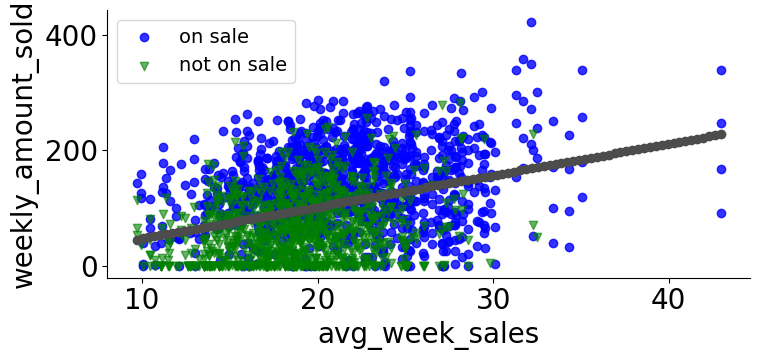

In [235]:
plt.rc('font', size=20)
fig = plt.figure()    

sns.lmplot(data=data,
           ci=None,
           x="avg_week_sales",
           y="weekly_amount_sold",
           scatter=False,
           height=4, aspect=2)

plt.scatter(x=data.query("is_on_sale==1")["avg_week_sales"],
            y=data.query("is_on_sale==1")["weekly_amount_sold"],
            label="on sale",
            color='blue',
            alpha=.8, marker=marker[0])

plt.scatter(x=data.query("is_on_sale==0")["avg_week_sales"],
            y=data.query("is_on_sale==0")["weekly_amount_sold"],
            label="not on sale",
            color='green', 
            alpha=.6, marker=marker[1])
plt.legend(fontsize="14")

## Identifying the Treatment Effect
 
### The Independence Assumption
 

### Identification with Randomization 
 

## Key Ideas
 